In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('SalePrice.csv', usecols= ['GarageQual', 'FireplaceQu', 'SalePrice'])
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
1075,Gd,TA,219500
349,Ex,TA,437154
489,NaN,TA,86000
356,NaN,TA,173000
1284,Gd,TA,169000


In [51]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

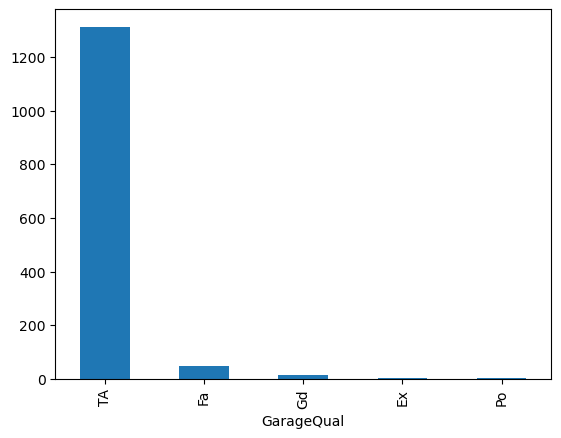

In [52]:
df['GarageQual'].value_counts().plot(kind = 'bar')

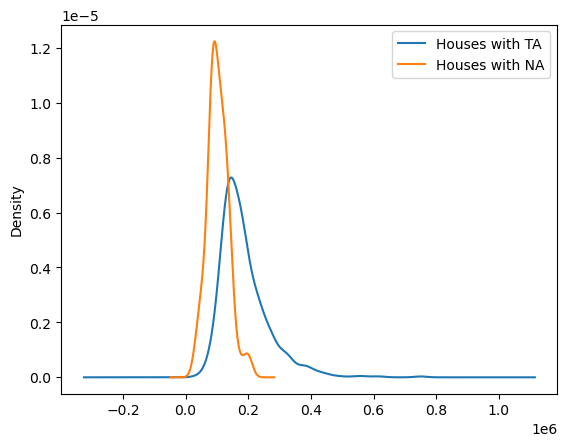

In [53]:
ax = plt.subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind= 'kde', ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind= 'kde', ax=ax)
labels = ['Houses with TA', 'Houses with NA']
ax.legend(labels)


In [54]:
temp = df[df['GarageQual']=='TA']['SalePrice']

df['GarageQual'].fillna('TA')


0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1460, dtype: object

<Axes: xlabel='GarageQual'>

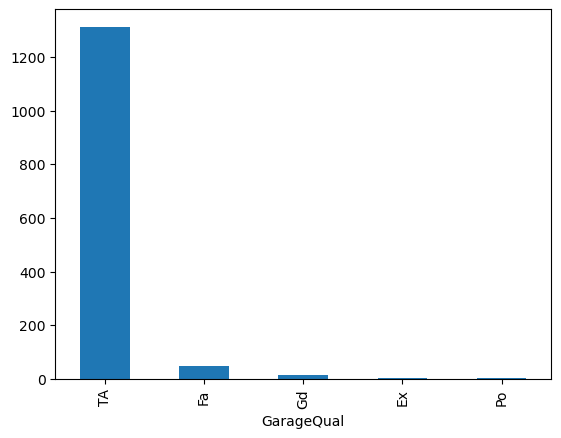

In [55]:
df['GarageQual'].value_counts().plot(kind='bar')


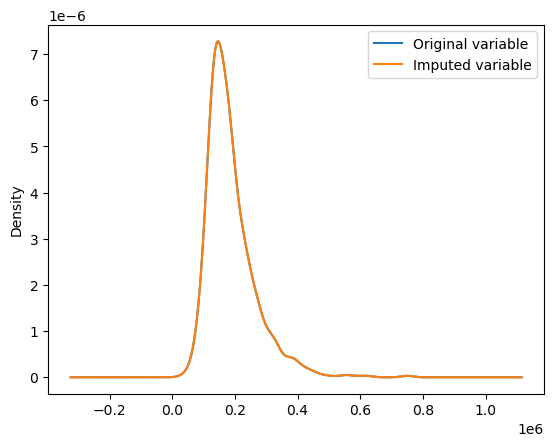

In [57]:
ax = plt.subplot(111)
temp.plot(kind='kde', ax=ax)
df[df['GarageQual']== 'TA']['SalePrice'].plot(kind= 'kde', ax=ax)

labels = ['Original variable', 'Imputed variable']

ax.legend(labels)


In [58]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

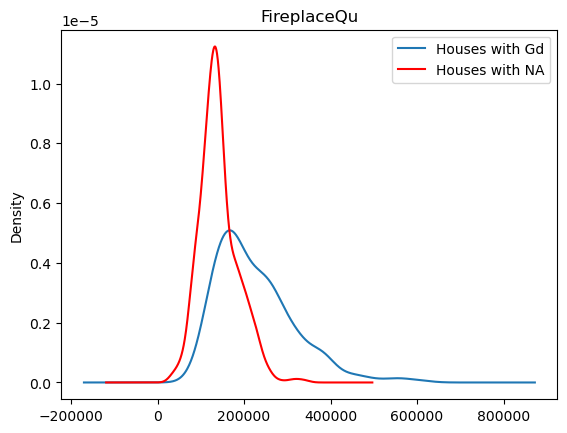

In [59]:

ax = plt.subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')


labels = ['Houses with Gd', 'Houses with NA']
ax.legend(labels)

plt.title('FireplaceQu')

/var/folders/cl/nx895lk15wz0q6n08sgg8vtr0000gn/T/ipykernel_57035/3410536703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

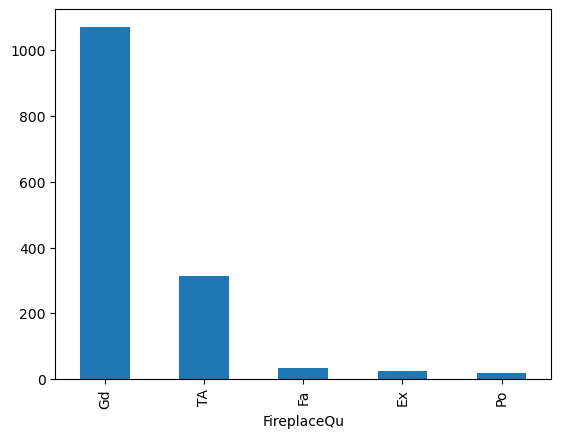

In [60]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd', inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

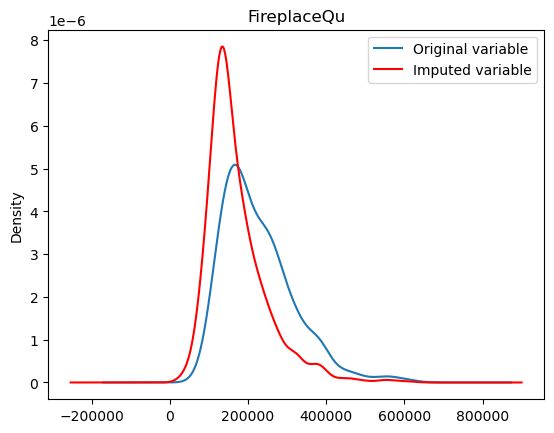

In [61]:
ax = plt.subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')


labels = ['Original variable', 'Imputed variable']
ax.legend(labels)

# add title
plt.title('FireplaceQu')

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [64]:
imputer.statistics_


array(['Gd', 'TA'], dtype=object)